In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 
import os 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

/Users/oliviazhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/oliviazhang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
data_path = './heart_failure_dataset.csv'
df = pd.read_csv(data_path, index_col=False)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,41,0,148,0,40,0,374000.00,0.80,140,1,1,68,0
1,66,0,434,1,24,1,268112.43,1.21,135,1,1,138,1
2,70,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
3,72,0,140,1,50,0,216218.24,0.98,134,1,0,32,0
4,60,0,235,1,38,0,329000.00,3.00,142,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,55,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
896,44,0,582,1,30,1,263358.03,1.60,130,1,1,244,0
897,70,0,838,1,35,1,304117.75,0.80,133,1,0,144,1
898,77,0,107,0,50,1,405514.68,1.11,137,1,1,209,1


# Check for missing values

In [3]:
missing_values = df.isnull().sum()

# Print the number of missing values per column
print(missing_values)

# To display columns with missing values only
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:\n", df[missing_columns].isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Columns with missing values:
 Series([], dtype: float64)


# Calculate summary statistics of each variable

In [4]:
# Count number of deaths 
deaths_count = df[df['DEATH_EVENT'] == 1].shape[0]
deaths_percentage = (deaths_count / df.shape[0]) * 100

deaths_count, deaths_percentage

(454, 50.44444444444445)

In [5]:
deaths_count2 = df['DEATH_EVENT'].sum()
deaths_count2

454

In [4]:
# Count number of female and percentage of female 
female_count = df[df['sex'] == 0].shape[0]
female_percentage = (female_count / df.shape[0]) * 100

female_count, female_percentage

(365, 40.55555555555556)

In [5]:
age_median = df['age'].median()

# IQR 
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)

print(f"{age_median} ({age_q1}, {age_q3})")

61.0 (54.0, 70.0)


In [6]:
anaemia_count = df[df['anaemia'] == 1].shape[0]
anaemia_percentage = (anaemia_count / df.shape[0]) * 100

anaemia_count, anaemia_percentage

(425, 47.22222222222222)

In [7]:
# Median
cpk_median = df['creatinine_phosphokinase'].median()

# IQR 
cpk_q1 = df['creatinine_phosphokinase'].quantile(0.25)
cpk_q3 = df['creatinine_phosphokinase'].quantile(0.75)
cpk_iqr = cpk_q3 - cpk_q1

print(f"{cpk_median} ({cpk_q1}, {cpk_q3})")

313.5 (134.75, 591.0)


In [8]:
# Number of patients with diabetes
diabetes_count = df[df['diabetes'] == 1].shape[0]

# Percentage of patients with diabetes
diabetes_percentage = (diabetes_count / df.shape[0]) * 100

diabetes_count, diabetes_percentage

(385, 42.77777777777778)

In [9]:
ej_median = df['ejection_fraction'].median()

# IQR 
ej_q1 = df['ejection_fraction'].quantile(0.25)
ej_q3 = df['ejection_fraction'].quantile(0.75)

print(f"{ej_median} ({ej_q1}, {ej_q3})")

35.0 (29.0, 42.0)


In [10]:
high_bp_count_actual = df[df['high_blood_pressure'] == 1].shape[0]

# Percentage of patients with high blood pressure in the actual dataset
high_bp_percentage_actual = (high_bp_count_actual / df.shape[0]) * 100

high_bp_count_actual, high_bp_percentage_actual

(394, 43.77777777777778)

In [11]:
pl_median = df['platelets'].median()

# IQR 
pl_q1 = df['platelets'].quantile(0.25)
pl_q3 = df['platelets'].quantile(0.75)

print(f"{pl_median} ({pl_q1}, {pl_q3})")

262026.815 (216205.13, 309040.6275)


In [12]:
df['serum_creatinine'].median()

1.18

In [13]:
df['serum_sodium'].median()

137.0

In [14]:
smoking_count = df[df['smoking'] == 1].shape[0]

# Percentage of patients with high blood pressure in the actual dataset
smoking_percent = (smoking_count / df.shape[0]) * 100

smoking_count, smoking_percent

(304, 33.77777777777778)

In [15]:
df['time'].median()

107.0

# Correlation matrix

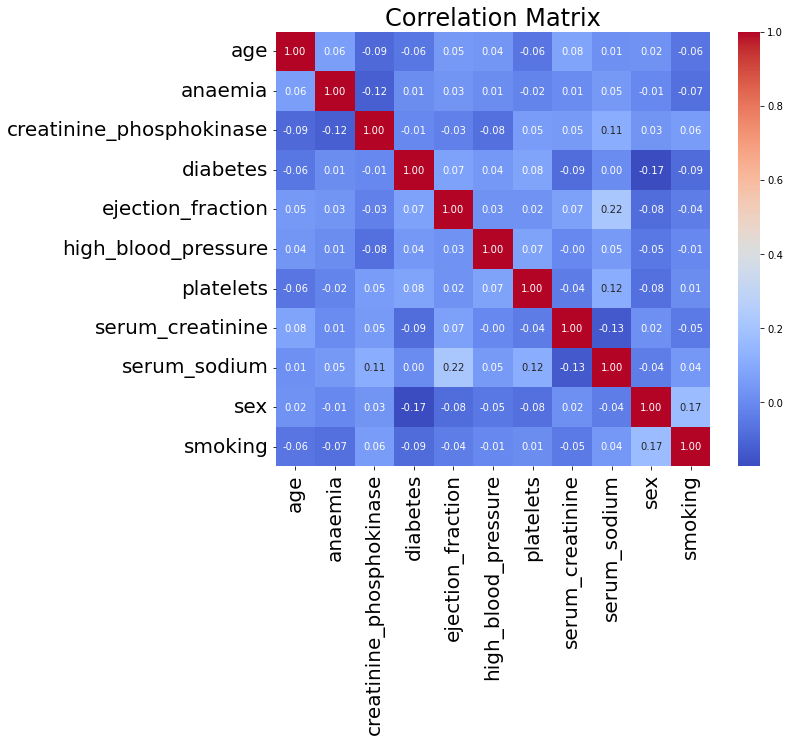

In [8]:
# Dropping 'time' and 'DEATH_EVENT' columns from the correlation matrix
corr_matrix_actual = df.drop(columns=['time', 'DEATH_EVENT']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_actual, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

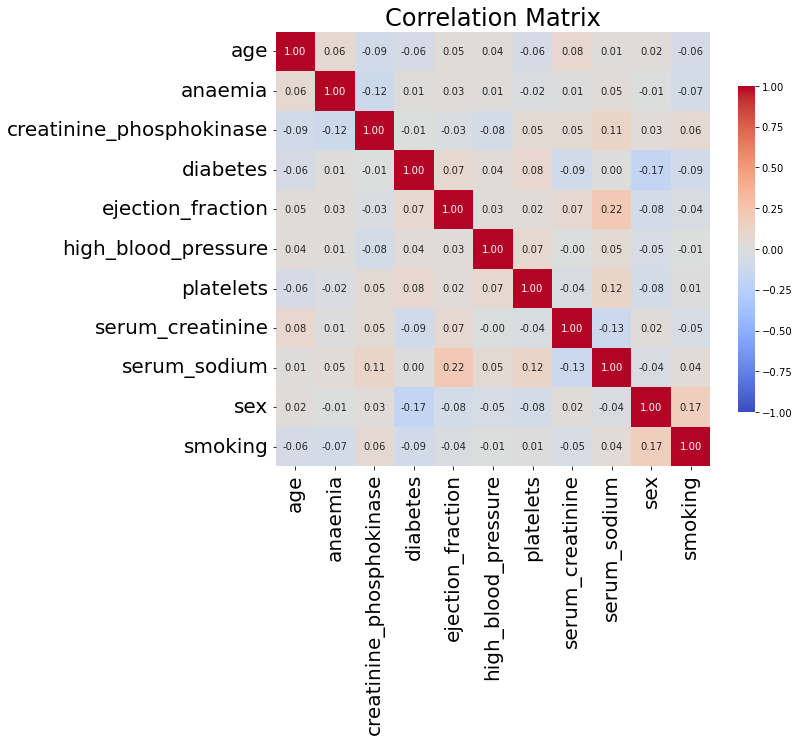

In [7]:
# Dropping 'time' and 'DEATH_EVENT' columns from the correlation matrix
corr_matrix_actual = df.drop(columns=['time', 'DEATH_EVENT']).corr()

# Plotting the correlation matrix with -1 as blue, 0 as white, and +1 as red
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_actual, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            vmin=-1, vmax=1, center=0, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# PCA

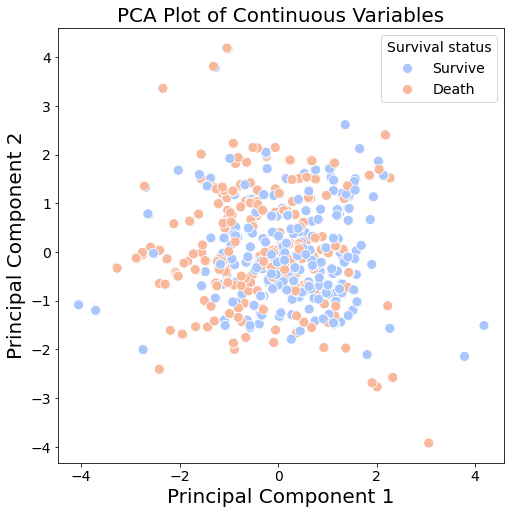

array([0.21628963, 0.19385832])

In [77]:
# Selecting continuous variables for PCA
continuous_vars = ['age', 'ejection_fraction', 'creatinine_phosphokinase', 
                   'serum_creatinine', 'serum_sodium', 'platelets']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[continuous_vars])

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components
pca_result = pca.fit_transform(df_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['DEATH_EVENT'] = df['DEATH_EVENT']

# Plotting PCA result with different colors for different death events
plt.figure(figsize=(8,8))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['DEATH_EVENT'].map({1:'Death', 0:"Survive"}), data=pca_df, palette='coolwarm',s=100)
plt.title('PCA Plot of Continuous Variables', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Survival status', title_fontsize=14, fontsize=14)  # Custom font size for title and labels

plt.show()

# Displaying the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
explained_variance

In [18]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,41,0,148,0,40,0,374000.00,0.80,140,1,1,68,0
1,66,0,434,1,24,1,268112.43,1.21,135,1,1,138,1
2,70,0,93,0,35,0,185000.00,1.10,134,1,1,208,0
3,72,0,140,1,50,0,216218.24,0.98,134,1,0,32,0
4,60,0,235,1,38,0,329000.00,3.00,142,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,55,0,748,0,45,0,263000.00,1.30,137,1,0,88,0
896,44,0,582,1,30,1,263358.03,1.60,130,1,1,244,0
897,70,0,838,1,35,1,304117.75,0.80,133,1,0,144,1
898,77,0,107,0,50,1,405514.68,1.11,137,1,1,209,1


# Histograms

<AxesSubplot:>

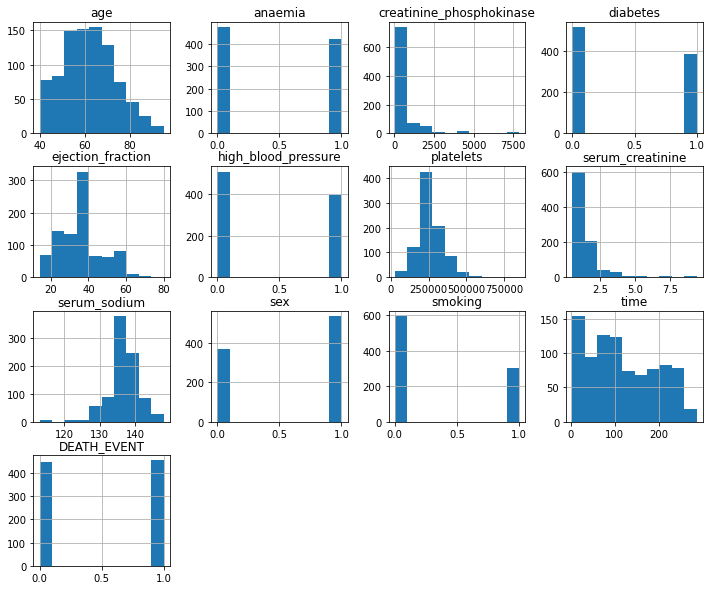

In [19]:
df.hist(figsize=(12, 10))
df.boxplot(column=['age', 'serum_sodium', 'ejection_fraction'], figsize=(10, 6))


# Distribution of features in each outcome class

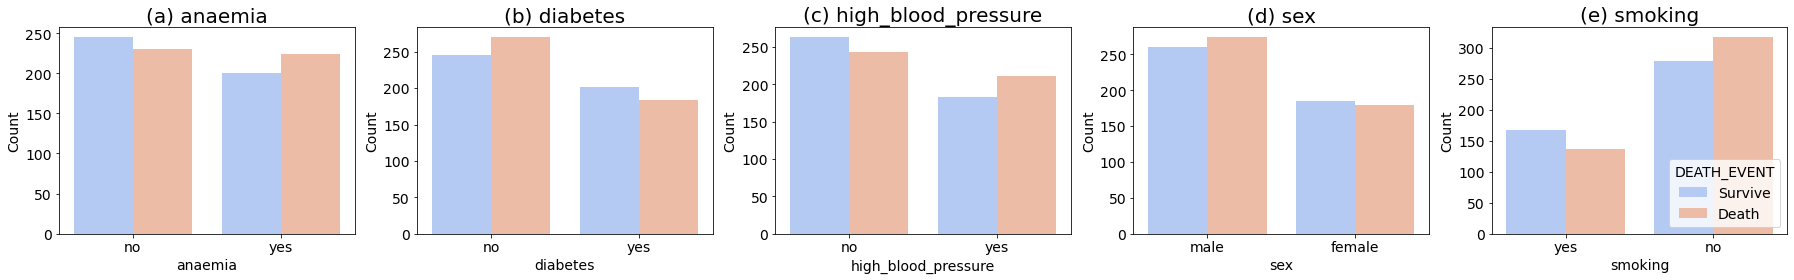

In [81]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
categorical_text = ['(a)','(b)', '(c)', '(d)', '(e)']
death_event_2_text = {1:'Death', 0:"Survive"}
sex_2_text = {0: 'female', 1: 'male'}
default_2_text = {0:'no', 1:'yes'}
# Set up the grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30, 4))
axes = axes.flatten()

# Generate a count plot for each categorical variable with respect to DEATH_EVENT
for i, var in enumerate(categorical_vars):
    text = categorical_text[i]
    # Mapping values directly in the countplot without altering the DataFrame
    mapped_x = df[var].map(default_2_text if var != 'sex' else sex_2_text)
    sns.countplot(x=mapped_x, 
                  hue=df['DEATH_EVENT'].map(death_event_2_text), 
                  ax=axes[i],
                 palette='coolwarm')
    axes[i].set_title(f'{text} {var}', fontsize=20)
    axes[i].legend(title='DEATH_EVENT', fontsize=14,title_fontsize=14,loc='lower right')
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    if i != 4: 
        axes[i].get_legend().remove()

# Remove the last subplot (since we only have 5 variables but 6 subplots)
fig.delaxes(axes[-1])

# Display the grid of plots
plt.tight_layout()
plt.show()

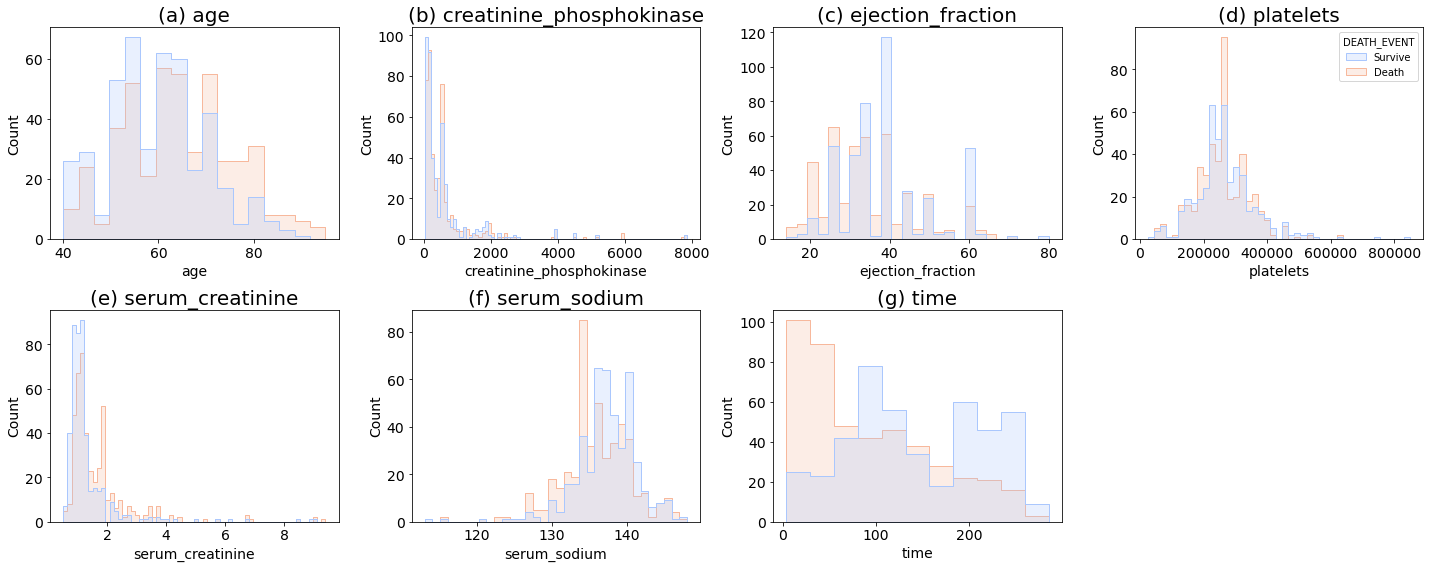

In [82]:
# List of continuous/integer variables
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
continuous_text = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', ]
# Set up the grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.flatten()

# Generate a histogram and box plot for each continuous variable with respect to DEATH_EVENT
for i, var in enumerate(continuous_vars):
    label = continuous_text[i]
    # Plot histogram with DEATH_EVENT as hue
    sns.histplot(data=df, x=var, hue=df['DEATH_EVENT'].map(death_event_2_text), element='step', stat='count', ax=axes[i], palette='coolwarm')
    
    axes[i].set_title(f'{label} {var}', fontsize=20)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xlabel(var, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    if i != 3:
        axes[i].get_legend().remove()

# Remove any unused subplot spots (in case the grid has more slots than needed)
for j in range(len(continuous_vars), len(axes)):
    fig.delaxes(axes[j])

# Display the grid of plots
plt.tight_layout()
plt.show()


# Box plots

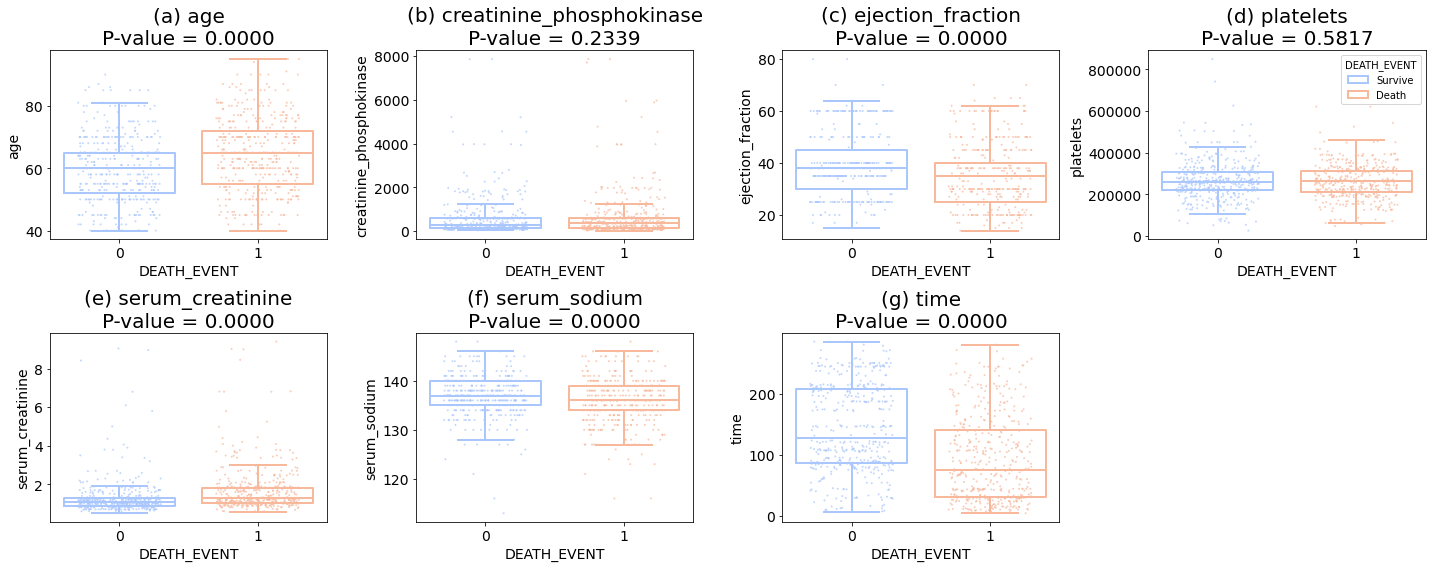

In [80]:
# Define the continuous variables and their labels
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
continuous_text = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)']

custom_palette = sns.color_palette("coolwarm", 2)
# Set up the grid for subplots, making the plots wider by increasing width of figsize
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))  # Increased width to 24
axes = axes.flatten()

# Generate scatter plots for each continuous variable stratified by DEATH_EVENT
for i, var in enumerate(continuous_vars):
    label = continuous_text[i]
    
    # Calculate the p-value using Mann-Whitney U test
    group_0 = df[df['DEATH_EVENT'] == 0][var]
    group_1 = df[df['DEATH_EVENT'] == 1][var]
    stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')
    
#     # Plot scatter plot with jitter and color points by DEATH_EVENT using coolwarm palette
    sns.stripplot(data=df, x='DEATH_EVENT', y=var, hue='DEATH_EVENT',
                  palette='coolwarm', jitter=0.3, size=2, ax=axes[i], alpha=0.7, legend=False)  # Reduced point size to 4

#     # Plot boxplot using coolwarm palette
#     sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], hue='DEATH_EVENT_TEXT', 
#                 palette=custom_palette, fill=False, fliersize=0, linewidth=2, dodge=False)
    sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], hue=df['DEATH_EVENT'].map(death_event_2_text), 
                palette=custom_palette, fill=False, fliersize=0, linewidth=2, dodge=False)

    # Adjust the color of box plots for each hue
    for patch, color in zip(axes[i].artists, custom_palette):
        patch.set_edgecolor(color)

    # Set the plot title and labels with p-value
    axes[i].set_title(f'{label} {var}\nP-value = {p_value:.4f}', fontsize=20)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)
    axes[i].set_xlabel('DEATH_EVENT', fontsize=14)
    axes[i].set_ylabel(var, fontsize=14)
    if i != 3: 
        axes[i].get_legend().remove()

# Remove any unused subplot spots (in case the grid has more slots than needed)
for j in range(len(continuous_vars), len(axes)):
    fig.delaxes(axes[j])

# Display the grid of plots
plt.tight_layout()
plt.show()